## <font color='green'>Project Introduction</font>

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

Each row in the dataset gives us the information about a house and its cost, which in our case is the target variable

Our aim is to create a  basic `regression model` that is able to predict house prices for a house in Bengaluru region given certain conditions. This project is also a End-to-end ML project

Checkout this project on website

Dataset link
<a href='https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data'>https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data</a>

## <font color='green'>Importing Libraries</font>

In [1433]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#standard Libraries
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)


from sklearn.model_selection import RandomizedSearchCV

#train-test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#model for regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#hyperparameter tunning
from sklearn.model_selection import GridSearchCV

#model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## <font color='green'>Loading Dataset</font>

In [1434]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


price : (target Variable) (in lack)

In [1435]:
data.shape

(13320, 9)

## <font color='green'>EDA</font>

In [1436]:
#checking if target variable has any null value, if any then we would remove that record
data['price'].isnull().sum()

0

In [1437]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [1438]:
#Checking for null values in the dataset
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Analysing `area_type` feature

In [1439]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Text(0, 0.5, 'Number of Houses')

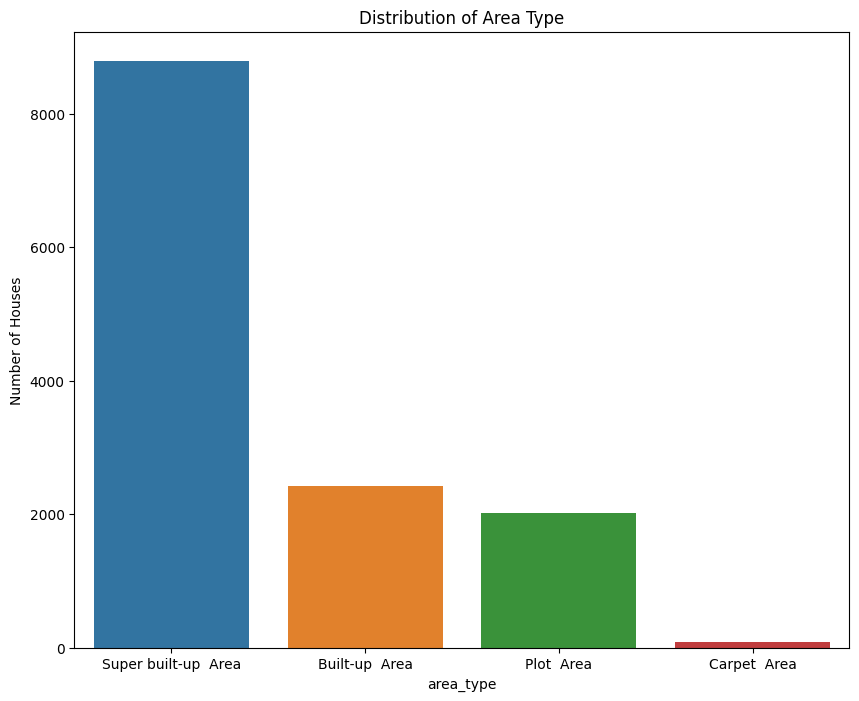

In [1440]:
sns.countplot(data=data, x=data['area_type'],order=data['area_type'].value_counts().index)
plt.title('Distribution of Area Type')
plt.ylabel('Number of Houses')


Text(0.5, 1.0, 'Distribution of area_type VS price')

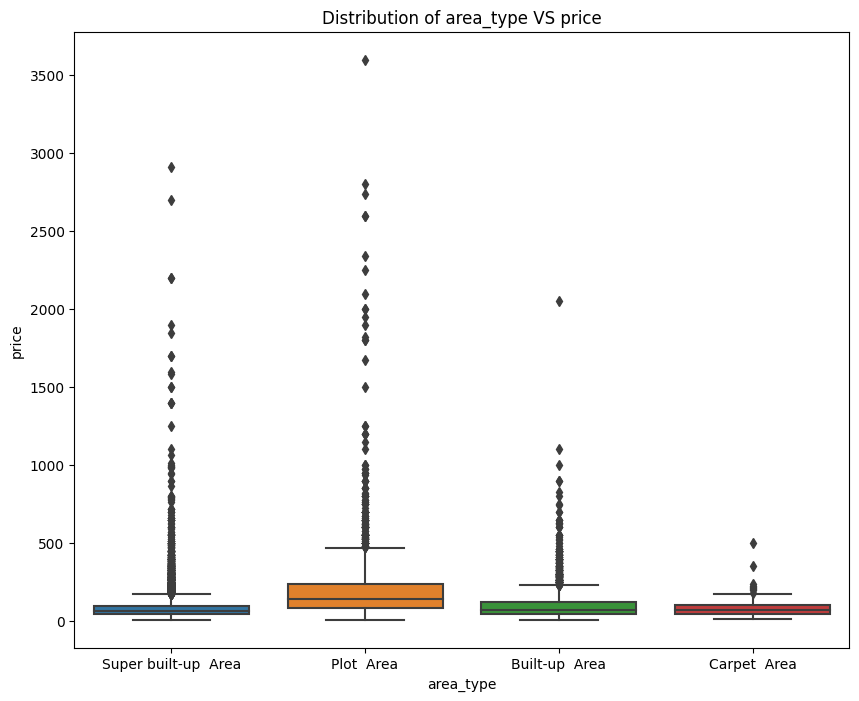

In [1441]:
sns.boxplot(data=data,x=data['area_type'],y=data['price'])
plt.title('Distribution of area_type VS price')


We can observed that the data over the `area_type` feature is not normally distributed. So if include this feature in out model the data will be more baised towared houses with `Super built-up Area`

### Analysis `availability` feature

In [1442]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, 'Ready To Move'),
  Text(1, 0, '18-Dec'),
  Text(2, 0, '18-May'),
  Text(3, 0, '18-Apr'),
  Text(4, 0, '18-Aug'),
  Text(5, 0, '19-Dec'),
  Text(6, 0, '18-Jul'),
  Text(7, 0, '18-Mar'),
  Text(8, 0, '18-Jun'),
  Text(9, 0, '20-Dec'),
  Text(10, 0, '21-Dec'),
  Text(11, 0, '19-Mar'),
  Text(12, 0, '18-Feb'),
  Text(13, 0, '18-Nov'),
  Text(14, 0, '18-Jan'),
  Text(15, 0, '18-Sep'),
  Text(16, 0, '19-Jun'),
  Text(17, 0, '18-Oct'),
  Text(18, 0, '19-Jan'),
  Text(19, 0, '19-Jul'),
  Text(20, 0, '17-Dec'),
  Text(21, 0, '20-Jan'),
  Text(22, 0, '17-Oct'),
  Text(23, 0, '19-Sep'),
  Text(24, 0, '22-Jun'),
  Text(25, 0

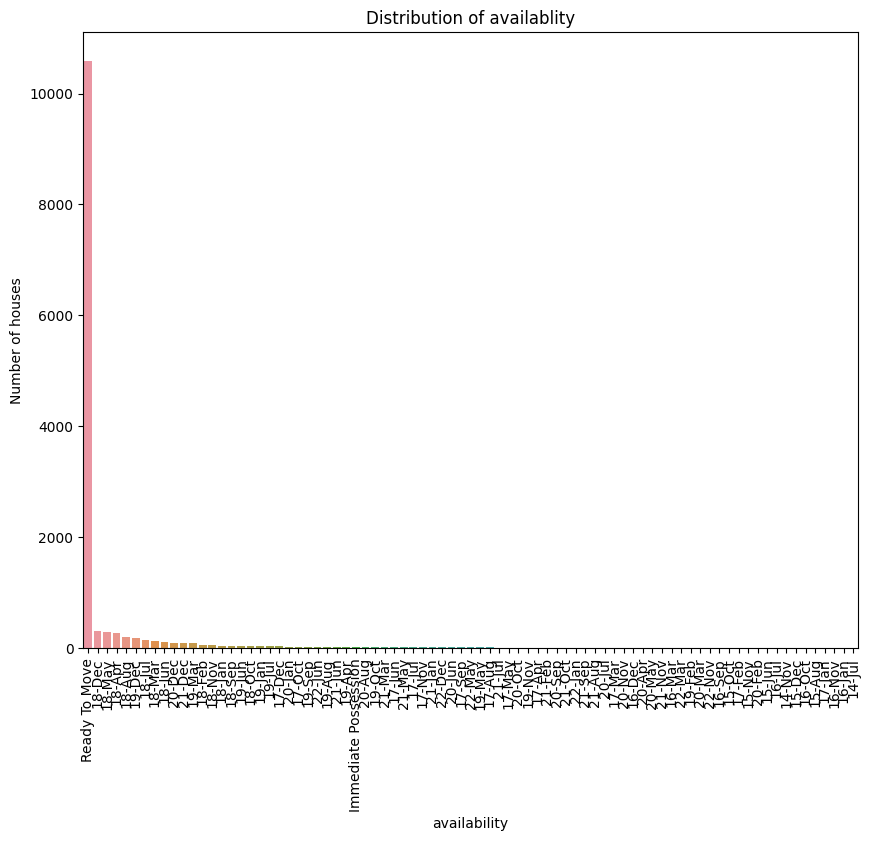

In [1443]:
sns.countplot(data=data, x= data['availability'],order=data['availability'].value_counts().index)
plt.title('Distribution of availablity')
plt.ylabel('Number of houses')
plt.xticks(rotation = 90)

In [1444]:
#how much percent of data is `Ready To Move`
(data[data['availability'] == 'Ready To Move'].shape[0] / data.shape[0]) * 100

79.43693693693695

Almost 79%  of data is `Ready to Move`and so it concludes that the data is not uniformly distributed. Also rest this feature data is kinda of similar to time series data. There can be ways to used this feature , like by converting the feature into categorical(ready to move, within week, within month and so on).
To avoid further complexity of the model, i will remove this feature form our model training

### Analysing `location` feature

In [1445]:
#checking for null values
data[data['location'].isnull() == True]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [1446]:
#checking for unique values
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [1447]:
#as data contains only one null value , filling it with most frequent value?
most_frequent_location = data['location'].mode()[0]
data['location'].fillna(most_frequent_location,inplace=True)

In [1448]:
data['location'].isnull().sum()

0

As `location` plays an important part we would not remove it from our dataset

### Analysing `size` feature

In [1449]:
data['size'].head(10)

0        2 BHK
1    4 Bedroom
2        3 BHK
3        3 BHK
4        2 BHK
5        2 BHK
6        4 BHK
7        4 BHK
8        3 BHK
9    6 Bedroom
Name: size, dtype: object

In [1450]:
#checking for null value
data['size'].isnull().sum()

16

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '2 BHK'),
  Text(1, 0, '3 BHK'),
  Text(2, 0, '4 Bedroom'),
  Text(3, 0, '4 BHK'),
  Text(4, 0, '3 Bedroom'),
  Text(5, 0, '1 BHK'),
  Text(6, 0, '2 Bedroom'),
  Text(7, 0, '5 Bedroom'),
  Text(8, 0, '6 Bedroom'),
  Text(9, 0, '1 Bedroom'),
  Text(10, 0, '8 Bedroom'),
  Text(11, 0, '7 Bedroom'),
  Text(12, 0, '5 BHK'),
  Text(13, 0, '9 Bedroom'),
  Text(14, 0, '6 BHK'),
  Text(15, 0, '7 BHK'),
  Text(16, 0, '1 RK'),
  Text(17, 0, '10 Bedroom'),
  Text(18, 0, '9 BHK'),
  Text(19, 0, '8 BHK'),
  Text(20, 0, '11 BHK'),
  Text(21, 0, '11 Bedroom'),
  Text(22, 0, '10 BHK'),
  Text(23, 0, '14 BHK'),
  Text(24, 0, '13 BHK'),
  Text(25, 0, '12 Bedroom'),
  Text(26, 0, '27 BHK'),
  Text(27, 0, '43 Bedroom'),
  Text(28, 0, '16 BHK'),
  Text(29, 0, '19 BHK'),
  Text(30, 0, '18 Bedroom')])

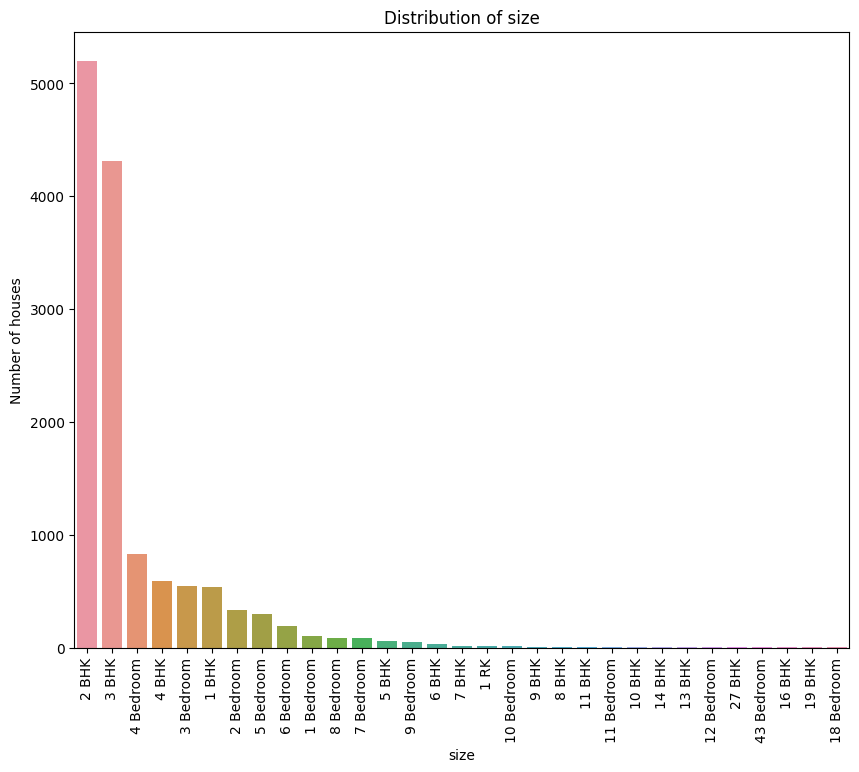

In [1451]:
sns.countplot(data=data, x= data['size'],order=data['size'].value_counts().index)
plt.title('Distribution of size')
plt.ylabel('Number of houses')
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '2 BHK'),
  Text(1, 0, '4 Bedroom'),
  Text(2, 0, '3 BHK'),
  Text(3, 0, '4 BHK'),
  Text(4, 0, '6 Bedroom'),
  Text(5, 0, '3 Bedroom'),
  Text(6, 0, '1 BHK'),
  Text(7, 0, '1 RK'),
  Text(8, 0, '1 Bedroom'),
  Text(9, 0, '8 Bedroom'),
  Text(10, 0, '2 Bedroom'),
  Text(11, 0, '7 Bedroom'),
  Text(12, 0, '5 BHK'),
  Text(13, 0, '7 BHK'),
  Text(14, 0, '6 BHK'),
  Text(15, 0, '5 Bedroom'),
  Text(16, 0, '11 BHK'),
  Text(17, 0, '9 BHK'),
  Text(18, 0, '9 Bedroom'),
  Text(19, 0, '27 BHK'),
  Text(20, 0, '10 Bedroom'),
  Text(21, 0, '11 Bedroom'),
  Text(22, 0, '10 BHK'),
  Text(23, 0, '19 BHK'),
  Text(24, 0, '16 BHK'),
  Text(25, 0, '43 Bedroom'),
  Text(26, 0, '14 BHK'),
  Text(27, 0, '8 BHK'),
  Text(28, 0, '12 Bedroom'),
  Text(29, 0, '13 BHK'),
  Text(30, 0, '18 Bedroom')])

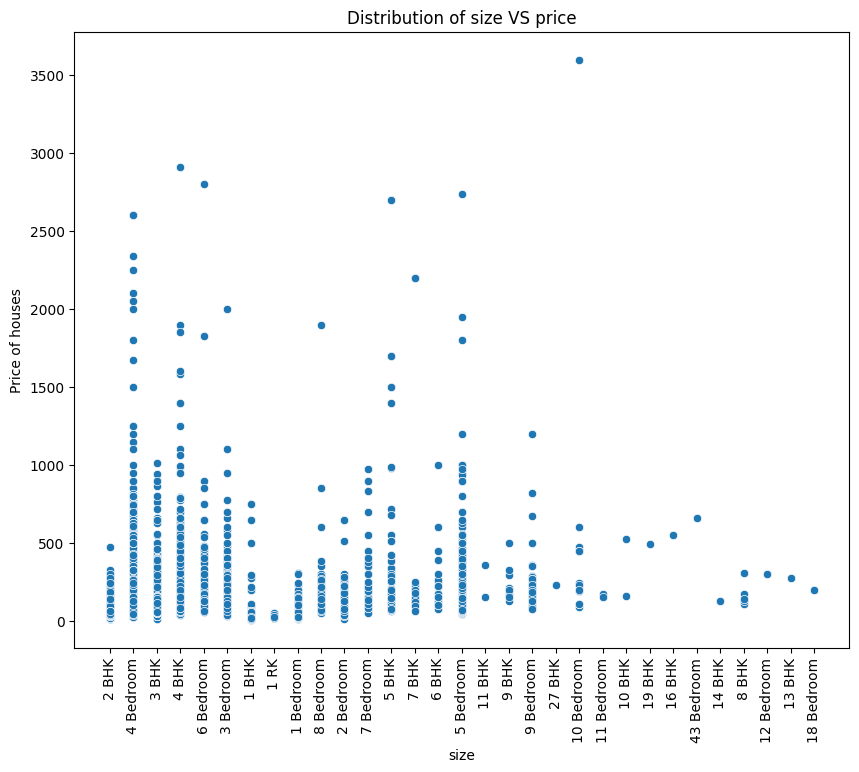

In [1452]:
sns.scatterplot(data=data,x=data['size'],y=data['price'])
plt.title('Distribution of size VS price')
plt.ylabel('Price of houses')
plt.xticks(rotation = 90)

From the above graphs we can absorved that `size` is an importance factor for predicting the `price`.
Though the features contains many outliers and feature engineering.
We will take care of that in [Feature Engineering](#feature) section

### Analysing `society` feature

In [1453]:
#total percent of missing data
(data['society'].isnull().sum()/len(data['price'])) * 100

41.306306306306304

As almost 41% of total data for is feature is `NaN` value , we can igonre this feature

### Analysing `total_sqft` feature

In [1454]:
data['total_sqft'].head(10)

0    1056
1    2600
2    1440
3    1521
4    1200
5    1170
6    2732
7    3300
8    1310
9    1020
Name: total_sqft, dtype: object

As this is a object data type ,We will need to convert this into a numerical data value

### Analysing `bath` feature

In [1455]:
data['bath'].isnull().sum()

73

Text(0.5, 1.0, 'Distribution of bath VS price')

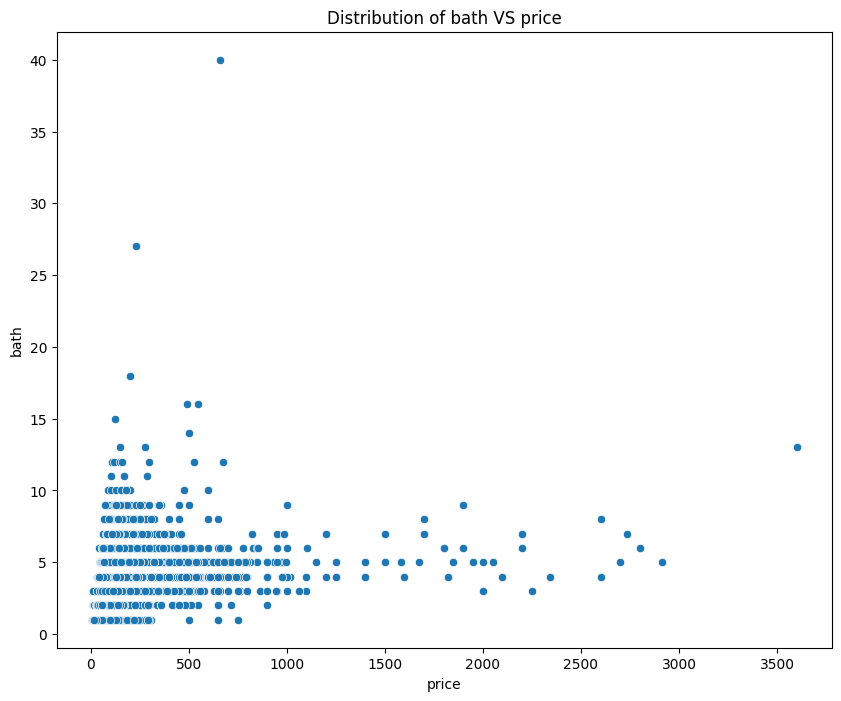

In [1456]:
sns.scatterplot(data=data,y=data['bath'],x=data['price'])
plt.title('Distribution of bath VS price')



We can observe that there is positive correalation between the `bath` feature and the `price` target variable

### Analysing `balcony` feature

In [1457]:
data['balcony'].isnull().sum()

609

In [1458]:
data['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

Text(0.5, 1.0, 'Distribution of balcony')

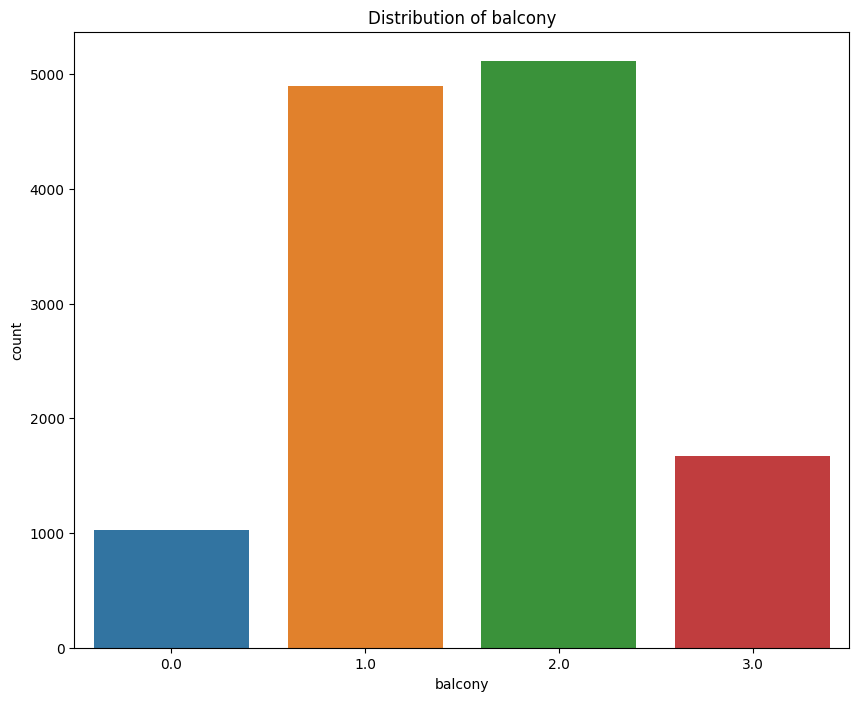

In [1459]:
sns.countplot(data = data , x=data['balcony'])
plt.title('Distribution of balcony')

Text(0.5, 1.0, 'Distribution of balcony VS price')

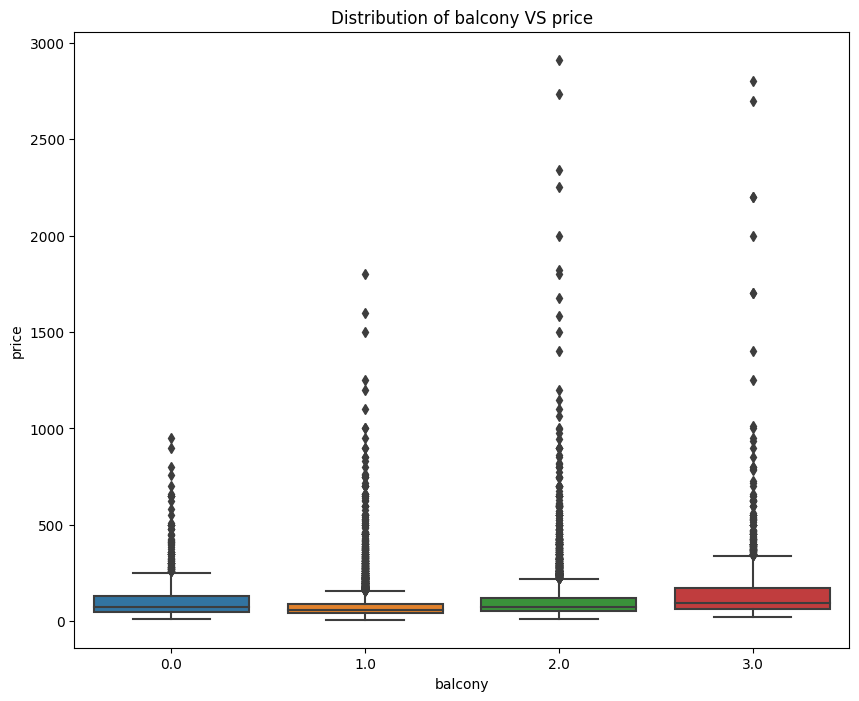

In [1460]:
sns.boxplot(data=data,x=data['balcony'],y=data['price'])
plt.title('Distribution of balcony VS price')

We can observe that there is positive correalation between the `balcony` feature and the `price` target variable, But the data present is not normally distributed.

## <font color='green'>Feature Engineering</font>

In [1461]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [1462]:
data1 = data.drop(columns = ['area_type','society','availability','balcony'],axis = 1)

In [1463]:
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [1464]:
data1.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [1465]:
#droping null value record as the total is musch less compare to dataset
data1.dropna(inplace = True)

In [1466]:
data1.shape

(13247, 5)

In [1467]:
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Feature : <font color='pink'>size</font>

In [1468]:
#feature extraction from size column
data1['bhk'] = data1['size'].apply(lambda x: int(x.split(' ')[0]))

In [1469]:
data1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [1470]:
data1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

As observe earlier , this feature is  of dtype `object` beacuse is contains value in range to

In [1471]:
#function to convert the value in float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [1472]:
data1[~data1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [1473]:
data1[~data1['total_sqft'].apply(is_float)]['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

Data is more un-uniform than we thought.
lets perform feature transfromation on data such that
****
for range value : (higher + lower)/2

In [1474]:
def convert_sqft_num(X):
    tokens = X.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(X)
    except:
        return None   
    
data2 = data1.copy()
data2.total_sqft = data2.total_sqft.apply(convert_sqft_num)
data2 = data2[data2.total_sqft.notnull()]
data2.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [1475]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13201 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13201 non-null  object 
 1   size        13201 non-null  object 
 2   total_sqft  13201 non-null  float64
 3   bath        13201 non-null  float64
 4   price       13201 non-null  float64
 5   bhk         13201 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


creating new feature price-per-sqft for detection of outlier as its also an important feature as per domain knowledge

### Feature : <font color='pink'>location</font>

In [1476]:
df = data2.copy()
len(df.location.unique())

1298

In [1477]:
df['location'] = df.location.apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               534
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

Subtituting all the locations with less than 10 houses as `others`

In [1478]:
print('Number of location with less than 10 houses: ',len(location_stats[location_stats <= 10]))
location_stats_less10 = location_stats[location_stats < 10]

Number of location with less than 10 houses:  1047


In [1479]:
df.location = df.location.apply(lambda x: 'Other' if x in location_stats_less10 else x)

In [1480]:
len(df.location.unique())

255

In [1481]:
df.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Other,6 Bedroom,1020.0,6.0,370.00,6


### Outlier Detection and removal

<Axes: >

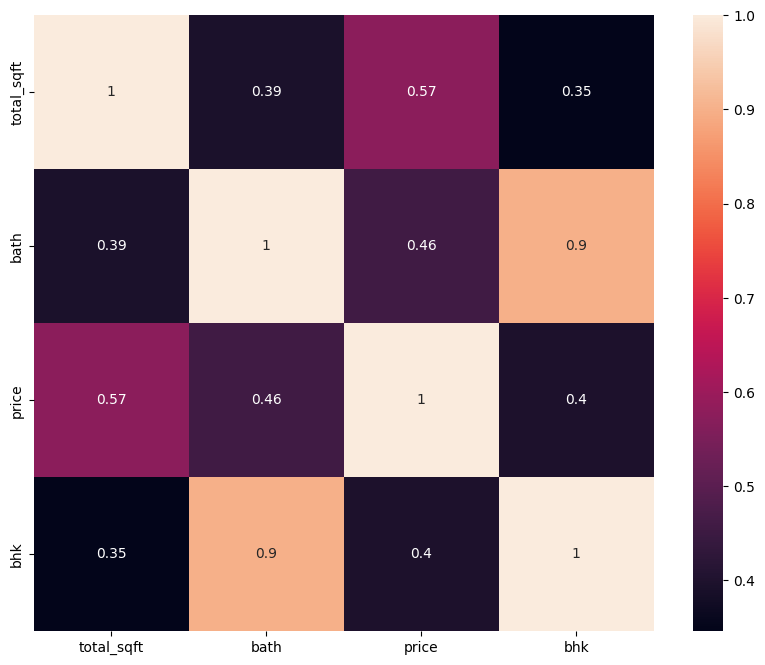

In [1482]:
sns.heatmap(df.corr(),annot=True)

In [1483]:
df[df.total_sqft/df.bhk < 300].shape

(744, 6)

In [1484]:
#a room ideally has 300 sqft area
df1 = df[~(df.total_sqft/df.bhk < 300)]
df1.shape

(12457, 6)

In [1485]:
df1['price_per_sqft'] = df1['price']*100000/df1['total_sqft']
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [1486]:
df1.price_per_sqft.describe()

count     12457.000000
mean       6308.427888
std        4167.968413
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [1487]:
#defining function for removal of outliers
def remove_outlier(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        st = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft>(m-st)) & (sub_df.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

In [1488]:
df2 = remove_outlier(df1)
df2.shape

(10223, 7)

In [1489]:
df2.location.unique

<bound method Series.unique of 0        1st Block Jayanagar
1        1st Block Jayanagar
2        1st Block Jayanagar
3        1st Block Jayanagar
4        1st Block Jayanagar
                ...         
10218           Yeshwanthpur
10219           Yeshwanthpur
10220           Yeshwanthpur
10221           Yeshwanthpur
10222           Yeshwanthpur
Name: location, Length: 10223, dtype: object>

In [1490]:
#checking prices as per area
def plt_scatter_chart(df,location):
    df_loc = df[df['location'] == location]
    sns.scatterplot(data = df_loc ,y='total_sqft',x='price',hue='bhk',style='bhk',palette='deep',size='bhk',sizes=(20,200))

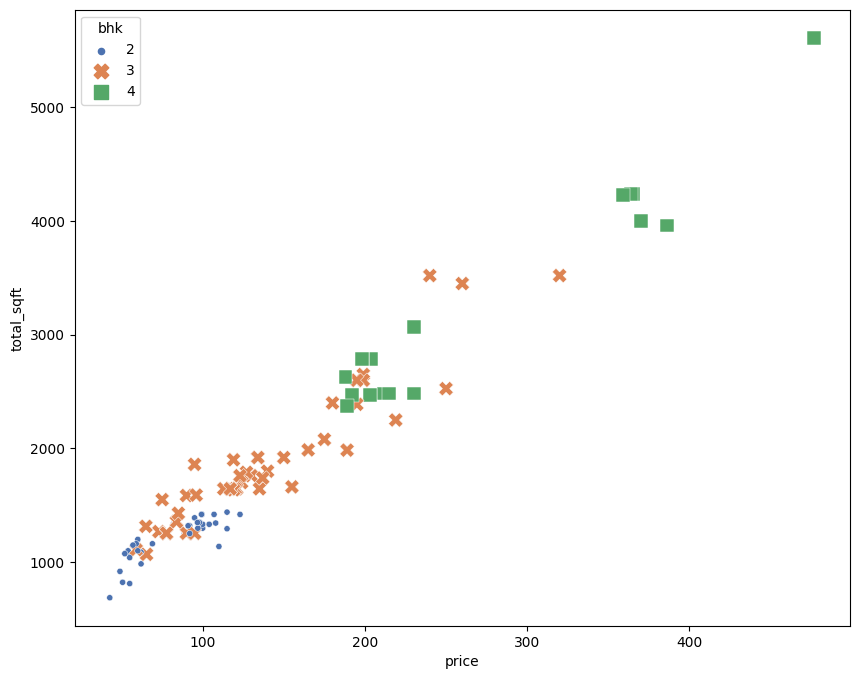

In [1491]:
plt_scatter_chart(df2,'Hebbal')

We can see that there are extreme cases in above chart where even though the sqft is same, their prices are extremly high

We will remove p the price pf roperties where for same location,3 bhk  is less than 2 bhk. We whould create a dictionary of stats for each given location per bhk i.e
```
{
    '1' : {
        'mean':4000,
        'std' : 2000,
        'count': 34
    },
    '2' : {
        'mean':6000,
        'std' : 2500,
        'count': 27
    },
}
```

In [1492]:
def remove_bhk_outlier(df):
    exclude_index = np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk] ={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            } 
        for bhk,bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_index = np.append(exclude_index,
                                          bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_index,axis='index')
    
            

In [1493]:
df2.shape

(10223, 7)

In [1494]:
df3 = remove_bhk_outlier(df2)
df3.shape

(7370, 7)

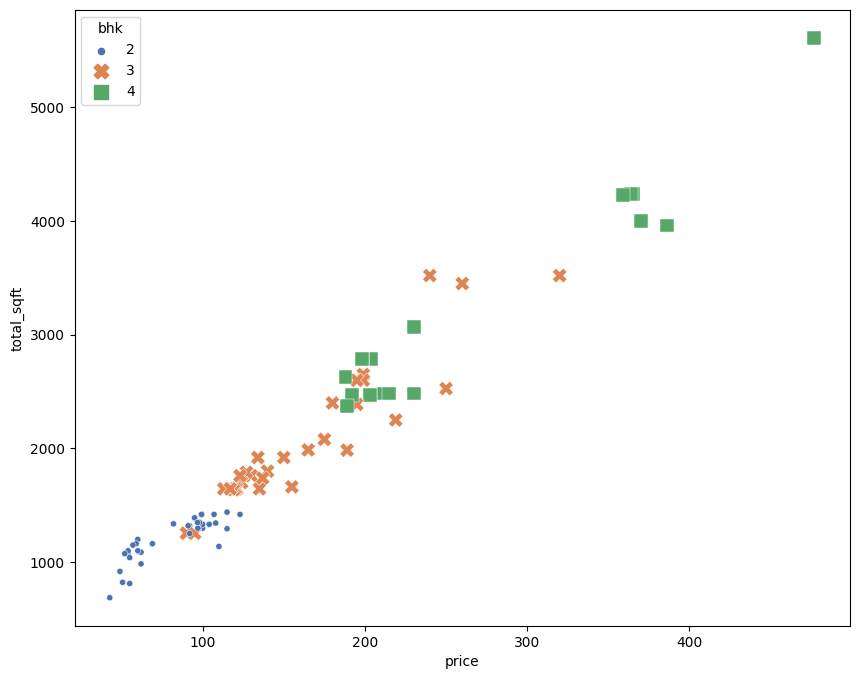

In [1495]:
plt_scatter_chart(df3,'Hebbal')

Text(0, 0.5, 'Count')

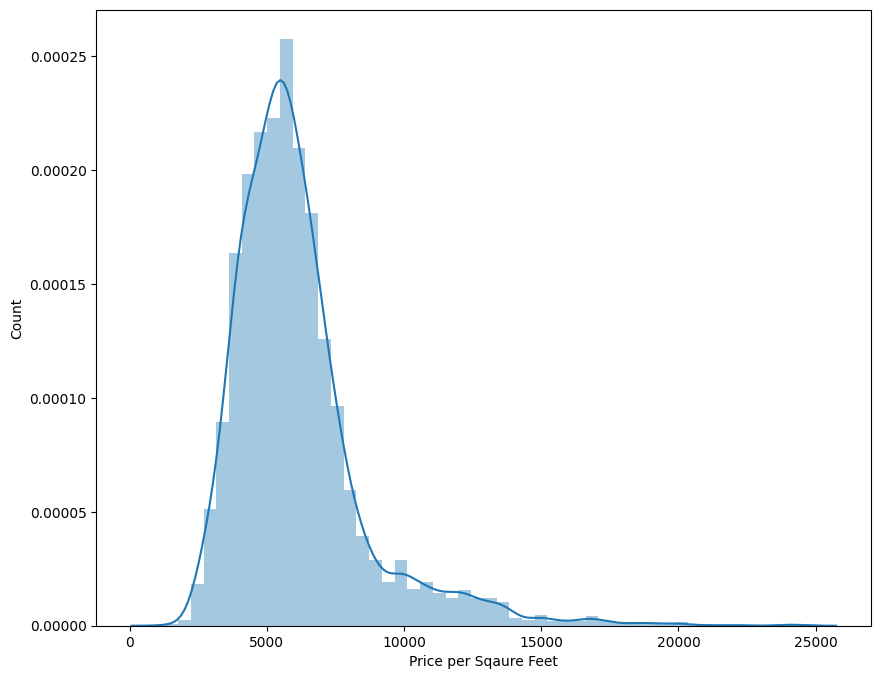

In [1496]:
sns.distplot(df3.price_per_sqft)
plt.xlabel('Price per Sqaure Feet')
plt.ylabel('Count')

 nearly normally distributed

In [1497]:
df3.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [1498]:
#Checking for bhks with more than 10 bath
df3[df3.bath > 10].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5972,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6058,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6754,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000


Text(0, 0.5, 'Number of houses')

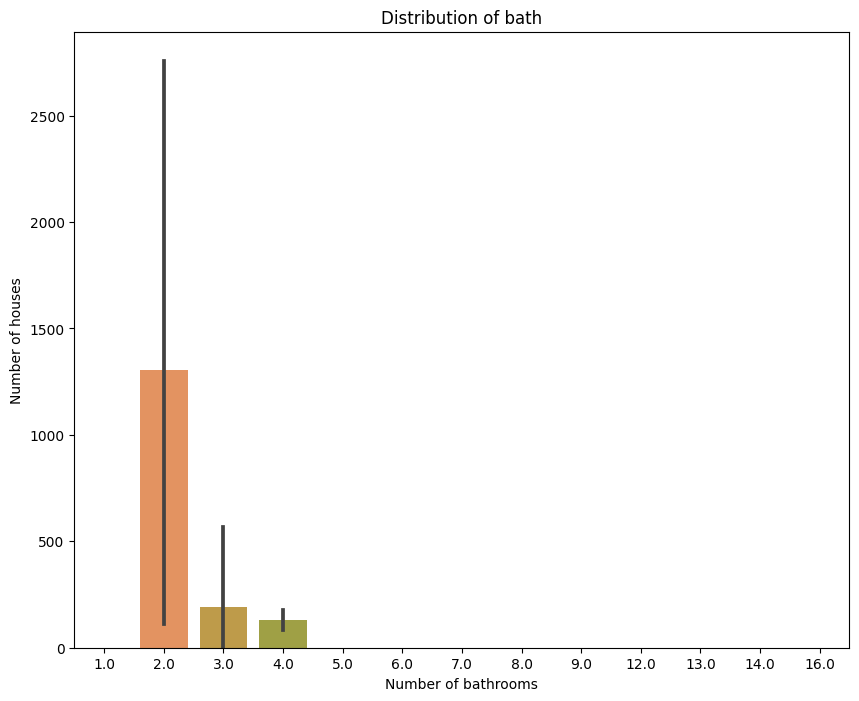

In [1499]:
#plotting distribution of bathroom
sns.barplot(x=df3.bath,y=df3.bath.value_counts())
plt.title('Distribution of bath')
plt.xlabel('Number of bathrooms')
plt.ylabel('Number of houses')


In [1500]:
#looking for properties where number of bathroom is much greater than the bhk mentioned
bath_outlier  = df3[df3.bath >= df3.bhk+2]

In [1501]:
df4 = df3[df3.bath < df3.bhk+2]
df4.shape

(7292, 7)

<Axes: >

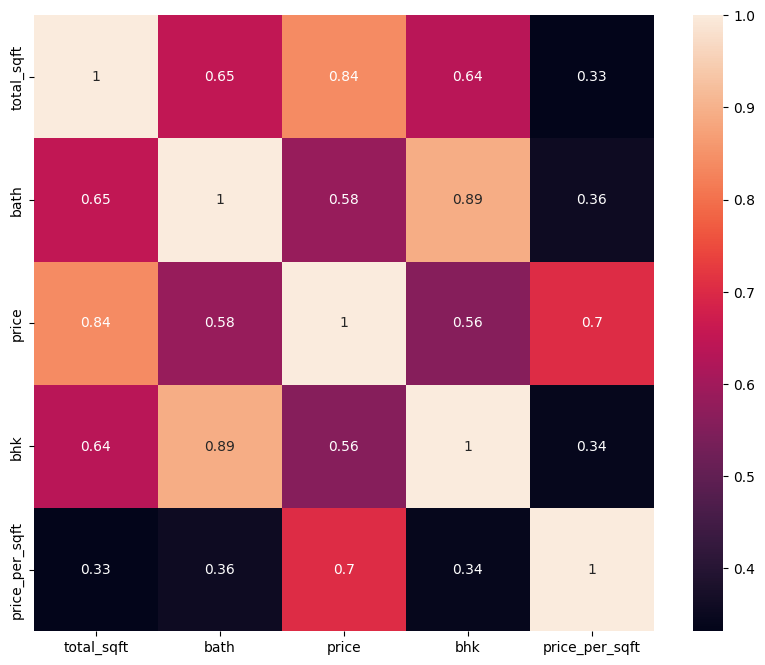

In [1502]:
sns.heatmap(df4.corr(),annot = True)

In [1503]:
#one hot encoding
df_clean = pd.get_dummies(df4)

In [1504]:
df_clean.head(10)


,total_sqft,bath,price,bhk,price_per_sqft,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_7 Bedroom,size_8 BHK,size_8 Bedroom,size_9 BHK,size_9 Bedroom
0,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,15018.181818,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,15020.408163,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1415.0,2.0,110.0,2,7773.851590,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,860.0,2.0,65.5,2,7616.279070,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3000.0,3.0,300.0,4,10000.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1505]:
df_clean.drop(['location_Other'],axis=1,inplace=True)

In [1506]:
df_clean.shape

(7292, 282)

In [1507]:
df_clean.total_sqft.describe()

count     7292.000000
mean      1474.961478
std        884.823752
min        300.000000
25%       1090.750000
50%       1255.000000
75%       1653.250000
max      30400.000000
Name: total_sqft, dtype: float64

## <font color='green'>Model Tunning</font>

In [1509]:
X = df_clean.drop(columns = ['price','price_per_sqft'],axis=1)
y = df_clean['price']



In [1510]:
#Spliting dataset into train,test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [1511]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8338838392253309

In [1514]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.83388384, 0.79136991, 0.90410647, 0.87507056, 0.88284095])

In [1517]:
#hyperparameter tunning
def find_best_model_using_features(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'n_jobs':[1,-1],
                'positive':[True,False]
                
            }  
        },
        'linear_reg_no_param':{
            'model':LinearRegression(),
            'params':{}
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'criterion' : [ 'poisson', 'squared_error', 'friedman_mse'],
                'max_depth':[2,4,6,8],
                'max_features' : ['sqrt','log2']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model',"best_score",'best_params'])
        

In [1518]:
find_best_model_using_features(X,y)

,model,best_score,best_params
0,linear_regression,0.857454,"{'n_jobs': 1, 'positive': False}"
1,linear_reg_no_param,0.857454,{}
2,lasso,0.684945,"{'alpha': 1, 'selection': 'random'}"
3,decision_tree,0.759339,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
4,random_forest,0.573978,"{'criterion': 'friedman_mse', 'max_depth': 8, ..."


We Can see that Linear regresson gives us the best scores with given parameters

In [1523]:
#combining the code
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

lr_new = LinearRegression(n_jobs=1,positive=False)
lr_new.fit(X_train,y_train)

X_train.shape


(5833, 280)

In [1524]:
lr_new.score(X_test,y_test)

0.8338838392253309

In [1531]:


def predict_price(location,sqft,bath,bhk):
    location_new = 'location_'+location
    loc_index = np.where(X.columns == location_new)[0][0]
    
    x =  np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_new.predict([x])[0]
    
predict_price('1st Phase JP Nagar',1000,2,2)

348.44294377072185